# STOR 120 Take Home Midterm 1

Due: Wednesday, September 20th, at 10:10am

Directions: The exam is open book, notes, course materials, and internet, BUT if you are found to be submitting the work of other students as your exam submission, an honor code violation will be reported. This could be by communication with others and the sharing of answers and code: during the exam time, with students in other sections of the course, by using the solutions to exams from previous semesters, or online answer tools such as Chegg, CourseHero, ChatGPT, etc. This is a zero tolerance policy and all suspected honor code violations will be reported. Just as with all course assignments, you should submit this exam to Gradescope as a Jupyter Notebook with the ipynb file extension. To receive full credit, you should show and run all of your code used to answer each question.

**Check your file on Gradescope to ensure that it is the file that you intended to submit!**

Run the cell below to set up the notebook.

In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
%matplotlib inline
plots.style.use('fivethirtyeight')

# NC State Salary Data

Some universities are opaque, bureaucratic institutions. To be transparent to tax payers, many public schools such as those in North Carolina openly report salary information. In this exam, you will analyze salary information for all employees of North Carolina State University, as of June 2023. This salary data is available in CSV format and titled *NCSU_salary_data.csv*. 

Run the cell below to import the data set.

In [2]:
NCSU_salary_data = Table.read_table('NCSU_salary_data.csv')
NCSU_salary_data

last_name,first_name,age,job_category,base_salary,department,title,hire_year
Abarca Gimenez,Agustin,39,"Research Professional, Physical Sciences, Senior Resear ...",94056,Nuclear Engineering,Senior Research Scholar,2018
Abasiekong,Nancy,71,Field Faculty AC,87094,West District- Cleveland,"Extension Agent [04,22]",1975
Abate,Anna,31,"Research Professional, Social Sciences, Research Scholar",69000,Ctr Fam & Community Engagement,Research Scholar,2022
Abate,Julia,49,"Chief Administrator, Major Center/Institute AD",136912,Fitts Dep Ind & Syst Eng-ERGO,Senior Executive Director,2006
Abbatoy,John,36,Assistant/Associate Coach-Strength and Conditioning,51750,Athletics-Camp Equip-Weight Rm,Asst Coach,2021
Aber,Daniel,49,Pharmacist AD,117706,CVM Teaching Hospital,Pharmacist,2006
Abergel,Rafi,39,"IT Client Support Professional, Specialist",78000,Acad Stu Aff-Tech Services,Integration&Solutions Prof II,2016
Abolhasani,Milad,36,Associate Professor,205000,Chemical & Biomolecular Engr,"Assoc Prof, Univ Fac Scholar",2016
Abraham,Laura,38,Library Paraprofessional,53152,Libraries,University Library Specialist,2008
Abrahamson,Elizabeth,23,Animal Care Technician,35000,CVM Teaching Hospital,Medical Support Tech - Shift,2022


**Question 1**. From the `NCSU_salary_data` table, how many people are employed by the Statistics department? Assign this value to `num_stats_employees`.

In [6]:
num_stats_employees = NCSU_salary_data.where('department', 'Statistics').num_rows

num_stats_employees

43

**Question 2.** For those employed by the Statistics department at NCSU, is there a relationship between their ages and base salaries? Answer this question by constructing a plot with ages on the horizontal axis and base salaries on the vertical axis. 

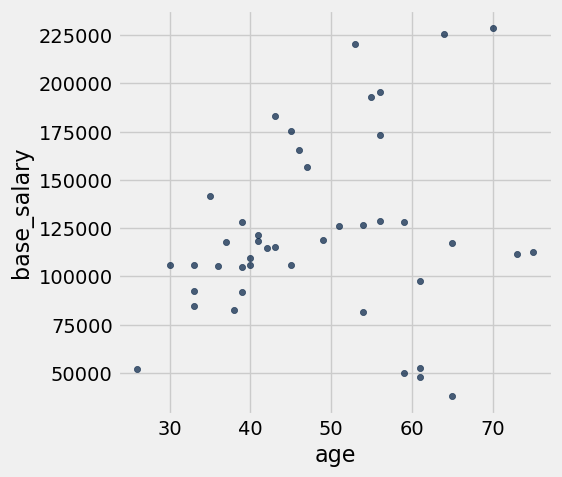

In [9]:
NCSU_salary_data.where('department', 'Statistics').scatter('age', 'base_salary')

**Question 3.** Construct a new table `NCSU_salary_data_1` that contains all of the rows and columns from `NCSU_salary_data` as well as a new column named `service_years`.  The values for `service_years` should be the number of full years (an integer) that the employee will have worked at NCSU by the end of 2023. For example, if an employee was hired at any date in 2016, they would have 7 full years of service time by the end of 2023. 

In [10]:
NCSU_salary_data_1 = NCSU_salary_data.with_column(
    'service_years',
    2023 - NCSU_salary_data.column('hire_year')
)
    
NCSU_salary_data_1

last_name,first_name,age,job_category,base_salary,department,title,hire_year,service_years
Abarca Gimenez,Agustin,39,"Research Professional, Physical Sciences, Senior Resear ...",94056,Nuclear Engineering,Senior Research Scholar,2018,5
Abasiekong,Nancy,71,Field Faculty AC,87094,West District- Cleveland,"Extension Agent [04,22]",1975,48
Abate,Anna,31,"Research Professional, Social Sciences, Research Scholar",69000,Ctr Fam & Community Engagement,Research Scholar,2022,1
Abate,Julia,49,"Chief Administrator, Major Center/Institute AD",136912,Fitts Dep Ind & Syst Eng-ERGO,Senior Executive Director,2006,17
Abbatoy,John,36,Assistant/Associate Coach-Strength and Conditioning,51750,Athletics-Camp Equip-Weight Rm,Asst Coach,2021,2
Aber,Daniel,49,Pharmacist AD,117706,CVM Teaching Hospital,Pharmacist,2006,17
Abergel,Rafi,39,"IT Client Support Professional, Specialist",78000,Acad Stu Aff-Tech Services,Integration&Solutions Prof II,2016,7
Abolhasani,Milad,36,Associate Professor,205000,Chemical & Biomolecular Engr,"Assoc Prof, Univ Fac Scholar",2016,7
Abraham,Laura,38,Library Paraprofessional,53152,Libraries,University Library Specialist,2008,15
Abrahamson,Elizabeth,23,Animal Care Technician,35000,CVM Teaching Hospital,Medical Support Tech - Shift,2022,1


**Question 4.** Retirement benefits in the Teachers & State Employees Retirement Program are fully vested after employees complete five years of service time. What proportion of current NCSU employees in `NCSU_salary_data_1` will be fully vest at the end of 2023 (assumming that all employees maintain their current employment)? Assign this proportion to `NCSU_vested_prop`.

In [11]:
NCSU_vested_prop = NCSU_salary_data_1.where(
    'service_years', are.above_or_equal_to(5)).num_rows / NCSU_salary_data_1.num_rows

NCSU_vested_prop

0.7099691221879135

**Question 5.** Employees enrolled in the Teachers & State Employees Retirement Program are required to contribute 6% of their salary to the fund. Suppose that all employees in the NCSU_salary_data are enrolled in this retirement program. Assign to `TERS_contribution` the total amount that would be contributed to the plan over a year (assuming that all of the employees and salaries stay the same to what is seen in `NCSU_salary_data`. Round the value to the nearest dollar.

In [14]:
TERS_contribution = round(sum(NCSU_salary_data.column('base_salary') * .06))

TERS_contribution

43939706

**Question 6.** What is the difference between the mean base salaries of employees in the `Statistics` department and the mean base salaries of employees in the `Mathematics` department (statistics minus mathematics)? Assign this value to `stat_math_salary_diff`.

In [16]:
stat_math_salary_diff = np.mean(NCSU_salary_data.where('department', 'Statistics').column('base_salary')) - np.mean(NCSU_salary_data.where('department', 'Mathematics').column('base_salary'))

stat_math_salary_diff

16352.061004381525

**Question 7.** Construct a table containing the five employees with the most service time to NCSU. The table should contain the employees' first and last names, title, and year hired (in that order). Assign this table to the name `longest_employed`. 

In [21]:
longest_employed = NCSU_salary_data.select(
    'first_name', 'last_name', 'title', 'hire_year').sort(
    'hire_year').take(np.arange(5))

longest_employed

first_name,last_name,title,hire_year
Nancy,Ellis,Administrative Support Assoc,1966
Barbara,Weinberg,University Library Technician,1967
Peggy,Olive,University Program Associate,1968
Robert,Patterson,Professor,1968
Thomas,Feeny,Professor,1970


**Question 8.** Write a function named `mean_base_salary_by_job_category` that take in two arguments, a job_category and a number of service years (in that order). The function should return the mean base salary for all employees of that job category with at least the given number of service years. The output should round to the nearest dollar.

In [22]:
def mean_base_salary_by_job_category(job_category, service_years):
    """Finds mean base salary for employees of a job category for a number of service years"""
    
    data_w_job_service = NCSU_salary_data_1.where(
        'job_category', job_category).where(
        'service_years', are.above_or_equal_to(service_years))
    
    return round(np.mean(data_w_job_service.column('base_salary')))
    
# Do not change the below code:
mean_base_salary_by_job_category('Department Assistant', 5) 

54528

**Question 9.** Construct a barplot showing the five job categories with the highest maximum salary in descending order from top to bottom.

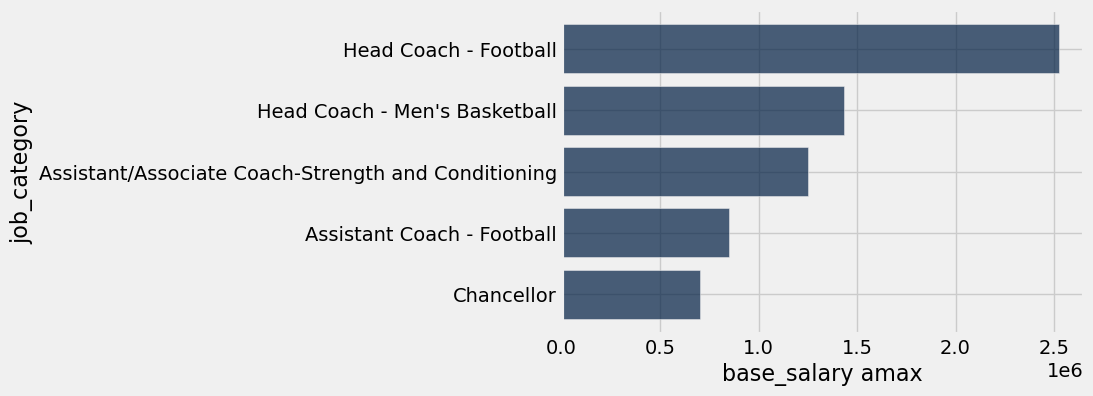

In [30]:
max_salary_per_jobc = NCSU_salary_data.select(
    'job_category', 'base_salary').group(
    'job_category', np.max).sort(
    'base_salary amax', 1).take(np.arange(5))

max_salary_per_jobc.barh('job_category', 'base_salary amax')